IMPORTING DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

DATA COLLECTION AND ANALYSIS

In [2]:
insurance_dataset = pd.read_csv("insurance.csv")

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Few Categorical Features:
1. sex       
2. smoker    
3. region    

In [6]:
#Checking for Missing Values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

DATA ANALYSIS

In [7]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 600x600 with 0 Axes>

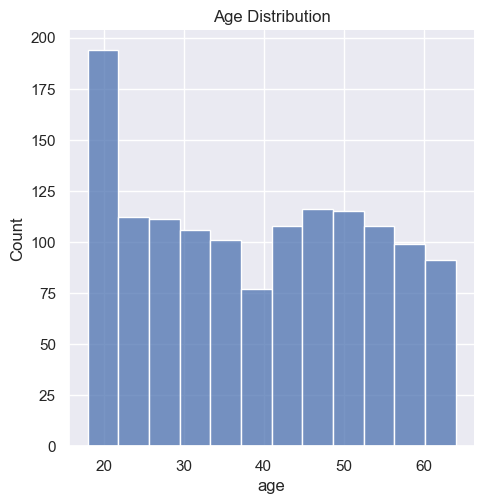

In [8]:
#Age column
sns.set_theme()
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["age"])
plt.title("Age Distribution")
plt.show()

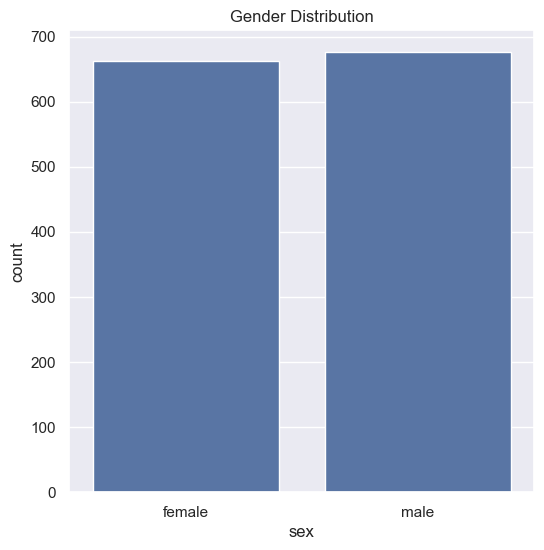

In [9]:
#Gender Column
plt.figure(figsize=(6,6))
sns.countplot(x="sex",data=insurance_dataset)
plt.title("Gender Distribution")
plt.show()

In [10]:
insurance_dataset["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

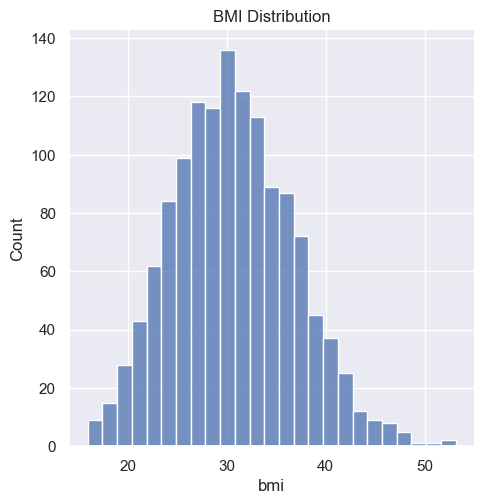

In [11]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset["bmi"])
plt.title("BMI Distribution")
plt.show()

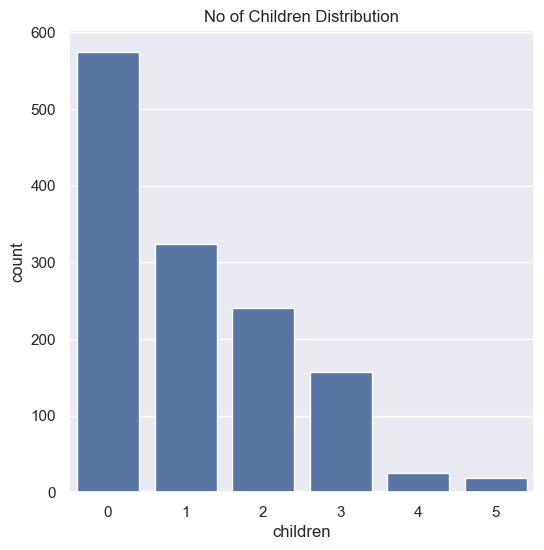

In [12]:
#No of Children
plt.figure(figsize=(6,6))
sns.countplot(x = "children" , data=insurance_dataset)
plt.title("No of Children Distribution")
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

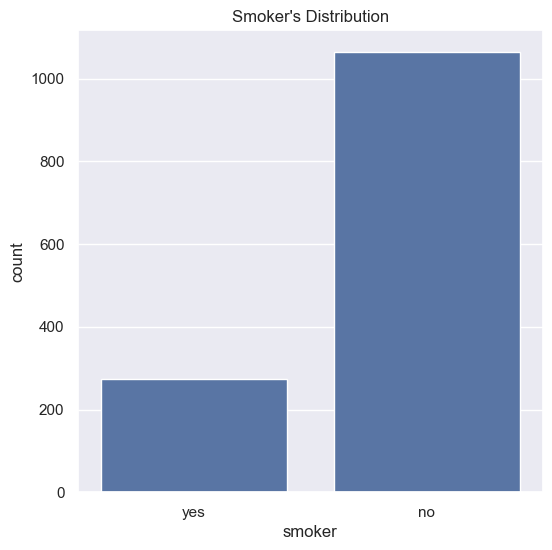

In [14]:
#Smoker Distributions
plt.figure(figsize=(6,6))
sns.countplot(x = "smoker" , data=insurance_dataset)
plt.title("Smoker's Distribution")
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

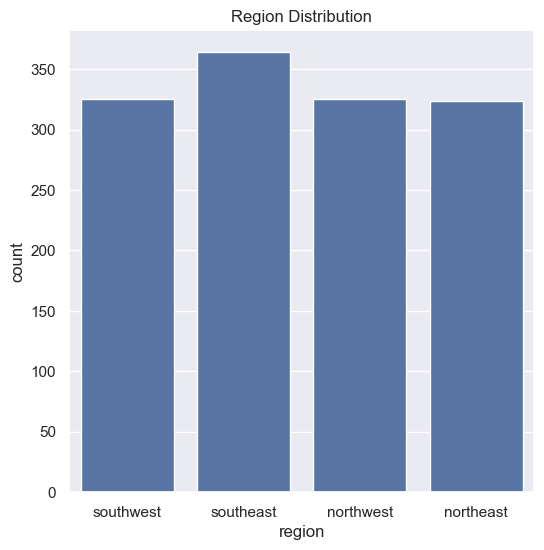

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x = "region" , data=insurance_dataset)
plt.title("Region Distribution")
plt.show()

In [17]:
insurance_dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<Figure size 600x600 with 0 Axes>

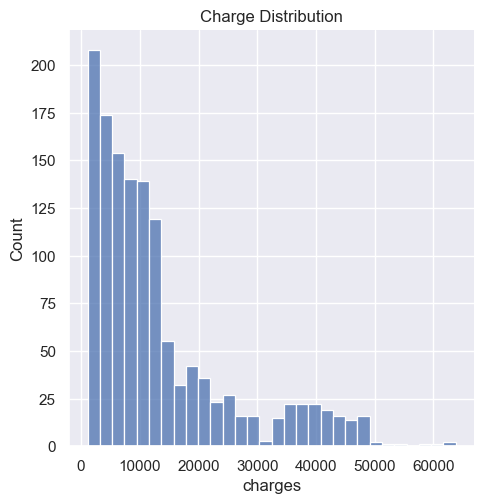

In [18]:
plt.figure(figsize=(6,6))
sns.displot(insurance_dataset['charges'])
plt.title("Charge Distribution")
plt.show()

DATA PREPROCESSING

Converting Categorical into Numerical

In [26]:
#Encoding Gender Columns
insurance_dataset.replace({"sex" : {"male" : 0 , "female" : 1}} , inplace=True)

#Encoding Smoker Columns
insurance_dataset.replace({"smoker" : {"yes" : 0 , "no" : 1}} , inplace=True)

#Encoding Region Column
insurance_dataset.replace({"region" : {"southeast" : 0 , "southwest" : 1 , "northeast" : 2 , "northwest" : 3}} , inplace = True)


Splitting Features And Target Data

In [27]:
X = insurance_dataset.drop(columns="charges" , axis=1)
Y = insurance_dataset["charges"]

In [ ]:
#Features Data
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [29]:
#Target Data
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64
